<img src='./img/logo_header.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./32_Sentinel-5P_TROPOMI_UVAI.ipynb"><< 32 - Sentinel-5P TROPOMI UVAI </a><span style=float:right;><a href="./51_CAMS_GFAS_FRPFIRE.ipynb">51 - CAMS GFAS FRPFIRE >></a></span>

# 4.1 LSA SAF data products for fire monitoring

###  Example Portugal fires in July 2020

The [LSA SAF](https://landsaf.ipma.pt/en/) is the Satellite Application Facility on Land Surface Analysis, which is part of the distributed EUMETSAT Application Ground Segment. It is focused on the development and processing of satellite products that characterize the continental surfaces, such as `radiation products`, `vegetation`, `evapotranspiration` and `wild fires`. 

You can see [here](https://landsaf.ipma.pt/en/about/catalogue/) an overview of all LSA SAF data products offered.
LSA SAF data products are available as `near-real time (NRT)` and `data records`. The LSA SAF `data records` are gridded Level 3 data for the period 2004-2015.



<hr>

#### Module outline:
* [1 - Load, browse and visualize LSA SAF EPS Daily Land Surface Temperature (EDLST)](#lst)
* [3 - Load, browse and visualize LSA SAF Fire Radiative Power Pixel (FRP Pixel)](#frp)
* [4 - Load, browse and visualize LSA SAF Normalized Difference Vegetation Index (NDVI)](#ndvi)

<hr>

#### Load required libraries

In [52]:
import os
from netCDF4 import Dataset
import xarray as xr
import datetime
import h5py
import numpy as np

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import BoundaryNorm, ListedColormap
import cartopy.feature as cfeature

from IPython.display import display, clear_output

#### Load helper functions

In [53]:
%run ./functions.ipynb

<hr>

<br>

## <a id='lst'></a>Load, browse and visualize LSA SAF EPS Daily Land Surface Temperature data (EDLST)

The [EDLST (EPS Daily Land Surface Temperature)](https://landsaf.ipma.pt/en/products/land-surface-temperature/edlst/) provides day- and night-time retrievals of land surface temperature (LST) based on clear-sky measurements from the Advanced Very High Resolution Radiometer (AVHRR) on-board the Metop-A/B/C satellites.

The LSA SAF EDLST data is disseminated in the `HDF5` format. You can load a `HDF5` file as `netCDF4.Dataset` with the help of the `netCDF4` library and the `Dataset` class. Additionally to the file name, the constructor requires the following kwargs:
* `diskless=True`
* `persist=False`
* `mode='r'`

The results is a `netCDF4.Dataset`, which contains the dataset's metadata, dimension and variable information

In [54]:
file_name = './eodata/lsa_saf/edlst/day/HDF5_LSASAF_M01-AVHR_EDLST-DAY_GLOBE_202007250000'

file = Dataset(file_name, diskless=True, persist=False, mode='r')
file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    SAF: LSA
    CENTRE: IPMA-PT
    ARCHIVE_FACILITY: IPMA-PT
    PRODUCT: EDLST
    PARENT_PRODUCT_NAME: CMa,2T,TPW,Brightness Temperature
    SPECTRAL_CHANNEL_ID: 768
    PRODUCT_ALGORITHM_VERSION: 1.1.0
    CLOUD_COVERAGE: NWC-CMa
    OVERALL_QUALITY_FLAG: OK
    ASSOCIATED_QUALITY_INFORMATION: -
    REGION_NAME: Global
    COMPRESSION: 9
    FIELD_TYPE: Product
    FORECAST_STEP: 0
    NC: 36000
    NL: 18001
    NB_PARAMETERS: 5
    NOMINAL_PRODUCT_TIME: 20200725000000
    SATELLITE: ['M01                                                                             `', '-                                                                               ', '-                                                                               p', '-                                                                               `', '-                                                                             

<br>

The next step is to transofrm the `netCDF4.Dataset` object into a `xarray.Dataset`. `xarray` is a powerful Python library which allows for a flexible handling of geographical data. You can us the function `open_dataset` to open a `netCDF4.Dataset` object, but you need to make us of the `xr.backends.NetCDF4DataStore()` backend.

The result is a `xarray.Dataset` with the data variables and dimension information. You see that the data is two-dimensional, and the dimensions are calle `phony_dim_0` and `phony_dim_1` respectively.

In [5]:
file_xr = xr.open_dataset(xr.backends.NetCDF4DataStore(file))
file_xr

<xarray.Dataset>
Dimensions:              (phony_dim_0: 18001, phony_dim_1: 36000)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    LST-day              (phony_dim_0, phony_dim_1) int16 ...
    QFLAG-day            (phony_dim_0, phony_dim_1) int8 ...
    VZA-day              (phony_dim_0, phony_dim_1) int8 ...
    aquisition_time-day  (phony_dim_0, phony_dim_1) int16 ...
    errorbar_LST-day     (phony_dim_0, phony_dim_1) int16 ...
Attributes:
    SAF:                             LSA
    CENTRE:                          IPMA-PT
    ARCHIVE_FACILITY:                IPMA-PT
    PRODUCT:                         EDLST
    PARENT_PRODUCT_NAME:             CMa,2T,TPW,Brightness Temperature
    SPECTRAL_CHANNEL_ID:             768
    PRODUCT_ALGORITHM_VERSION:       1.1.0
    CLOUD_COVERAGE:                  NWC-CMa
    OVERALL_QUALITY_FLAG:            OK
    ASSOCIATED_QUALITY_INFORMATION:  -
    REGION_NAME:                     Global
    COMPRESSION:                     9
    FIELD_TYPE:                      Product
    FORECAST_STEP:                   0
    NC:                              36000
    NL:                              18001
    NB_PARAMETERS:                   5
    NOMINAL_PRODUCT_TIME:            20200725000000
    SATELLITE:                       ['M01                                   ...
    INSTRUMENT_ID:                   AVHR
    INSTRUMENT_MODE:                 NORMAL_VIEW
    IMAGE_ACQUISITION_TIME:          20200725000000
    ORBIT_TYPE:                      LEO
    PROJECTION_NAME:                 SINUSOIDAL(0)
    NOMINAL_LONG:                    0.0
    NOMINAL_LAT:                     0.0
    CFAC:                            0
    LFAC:                            0
    COFF:                            0
    LOFF:                            0
    START_ORBIT_NUMBER:              0
    END_ORBIT_NUMBER:                0
    SUB_SATELLITE_POINT_START_LAT:   90.0
    SUB_SATELLITE_POINT_START_LON:   -180.0
    SUB_SATELLITE_POINT_END_LAT:     -90.0
    SUB_SATELLITE_POINT_END_LON:     179.99
    SENSING_START_TIME:              202007250001
    SENSING_END_TIME:                202007252358
    PIXEL_SIZE:                      1km
    GRANULE_TYPE:                    DP
    PROCESSING_LEVEL:                03
    PRODUCT_TYPE:                    LSAEDLST
    PRODUCT_ACTUAL_SIZE:             403703808
    PROCESSING_MODE:                 N
    DISPOSITION_FLAG:                O
    TIME_RANGE:                      daily
    STATISTIC_TYPE:                  -
    MEAN_SSLAT:                      0.0
    MEAN_SSLON:                      0.0
    PLANNED_CHAN_PROCESSING:         0
    FIRST_LAT:                       0.0
    FIRST_LON:                       0.0

<br>

You are interested in the variable `LST-day`, which holds the ESP Land Surface Temperature information. With squared brackets (`[]`), you can extract a xarray.DataArray from a xarray.Dataset.

Additionally, you also want to store the `UNITS`, `SCALING_FACTOR` and `MISSING_VALUES` from the available attributes as individual variables.

In [55]:
lst_day = file_xr['LST-day']
lst_day

unit = lst_day.UNITS
unit

scaling_factor = lst_day.SCALING_FACTOR
missing_value = lst_day.MISSING_VALUE


<br>

The next step is to define latitude and longitude coordinate information, which are required to visualize the data. First, we create two numpy arrays for `latitude` and `longitude` with the function `np.arange()`. The resolution of the data is 0.01 x 0.01 degrees.

In [56]:
latitude = np.flip(np.arange(-90,90.01, 0.01))
latitude

longitude = np.arange(-180., 180., 0.01)
longitude

latitude

array([ 90.  ,  89.99,  89.98, ..., -89.98, -89.99, -90.  ])

<br>

The created arrays for `latitude` and `longitude` can now be assigned as coordinates to the `lst_day` DataArray. You can use xarray's function `assign_coords()` to do so.

In a subsequent step, you want to renamed the dimension names from `phony_dim_0` and `phony_dim_1` to `latitude` and `longitude` respectively.

In [13]:
lst_day = lst_day.assign_coords(phony_dim_0=latitude)
lst_day = lst_day.assign_coords(phony_dim_1=longitude)

lst_day_renamed = lst_day.rename({'phony_dim_0': 'latitude', 'phony_dim_1': 'longitude'})
lst_day_renamed

<xarray.DataArray 'LST-day' (latitude: 18001, longitude: 36000)>
[648036000 values with dtype=int16]
Coordinates:
  * latitude   (latitude) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    PRODUCT:         LST-day
    PRODUCT_ID:      0
    N_COLS:          36000
    N_LINES:         18001
    NB_BYTES:        2
    SCALING_FACTOR:  100.0
    OFFSET:          0.0
    MISSING_VALUE:   -29999
    UNITS:           degrees (C)
    CAL_SLOPE:       999.0
    CAL_OFFSET:      999.0

<br>

Let us now create a geographical subset for Portugal and Spain, as this is the area of interest. You can use the function `generate_geographical_subset` to create the subset. You need to define first the latitude and longitude minimum and maximum bounds. The result is a subset with 850 latitude entries and 1100 longitude entries.

In [44]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = 0.

lst_day_subset = generate_geographical_subset(lst_day_renamed,
                                             latmin,
                                             latmax,
                                             lonmin,
                                             lonmax)
lst_day_subset

<xarray.DataArray 'LST-day' (latitude: 850, longitude: 1100)>
array([[-29999., -29999., -29999., ...,   2840.,   3008.,   3103.],
       [-29999., -29999., -29999., ...,   2840.,   3008.,   3029.],
       [-29999., -29999., -29999., ...,   2840.,   2872.,   2815.],
       ...,
       [-29999., -29999., -29999., ...,   4780.,   4780.,   4719.],
       [-29999., -29999., -29999., ...,   4902.,   4799.,   4669.],
       [-29999., -29999., -29999., ...,   4970.,   4799.,   4757.]])
Coordinates:
  * latitude   (latitude) float64 43.99 43.98 43.97 43.96 ... 35.52 35.51 35.5
  * longitude  (longitude) float64 -10.99 -10.98 -10.97 ... -0.01 -1.637e-10
Attributes:
    PRODUCT:         LST-day
    PRODUCT_ID:      0
    N_COLS:          36000
    N_LINES:         18001
    NB_BYTES:        2
    SCALING_FACTOR:  100.0
    OFFSET:          0.0
    MISSING_VALUE:   -29999
    UNITS:           degrees (C)
    CAL_SLOPE:       999.0
    CAL_OFFSET:      999.0

<br>

One step before visualisation is to filter out `MISSING_VALUES`. With xarray's function `where` you can say that you only want to keep the pixels which are not equal to the `MISSING_VALUE=-29999.`. The result is that the missing values are replaced with `NaN`.

In [57]:
lst_day_masked = lst_day_subset.where(lst_day_subset != missing_value, drop=True)
lst_day_masked

<xarray.DataArray 'LST-day' (latitude: 843, longitude: 742)>
array([[  nan,   nan,   nan, ..., 2840., 3008., 3103.],
       [  nan,   nan,   nan, ..., 2840., 3008., 3029.],
       [  nan,   nan,   nan, ..., 2840., 2872., 2815.],
       ...,
       [  nan,   nan,   nan, ..., 4780., 4780., 4719.],
       [  nan,   nan,   nan, ..., 4902., 4799., 4669.],
       [  nan,   nan,   nan, ..., 4970., 4799., 4757.]])
Coordinates:
  * latitude   (latitude) float64 43.99 43.98 43.97 43.96 ... 35.52 35.51 35.5
  * longitude  (longitude) float64 -7.41 -7.4 -7.39 ... -0.02 -0.01 -1.637e-10
Attributes:
    PRODUCT:         LST-day
    PRODUCT_ID:      0
    N_COLS:          36000
    N_LINES:         18001
    NB_BYTES:        2
    SCALING_FACTOR:  100.0
    OFFSET:          0.0
    MISSING_VALUE:   -29999
    UNITS:           degrees (C)
    CAL_SLOPE:       999.0
    CAL_OFFSET:      999.0

<br>

The last step is to visualize the `EPS Land Surface Temperature` for Portugal and Spain for 25 July 2020. You can use matploblib's `pcolormesh` function in combination with the `Cartopy` library, which is a powerful library to respresent data in different projections. The EDLST data are natively disseminate on a `Sinusoidal` grid. 
Additionally, you have to divide the `lst_day` data values with the `scaling_factor` to represent the `EPS Land Surface Temperature` in degrees Celsius.

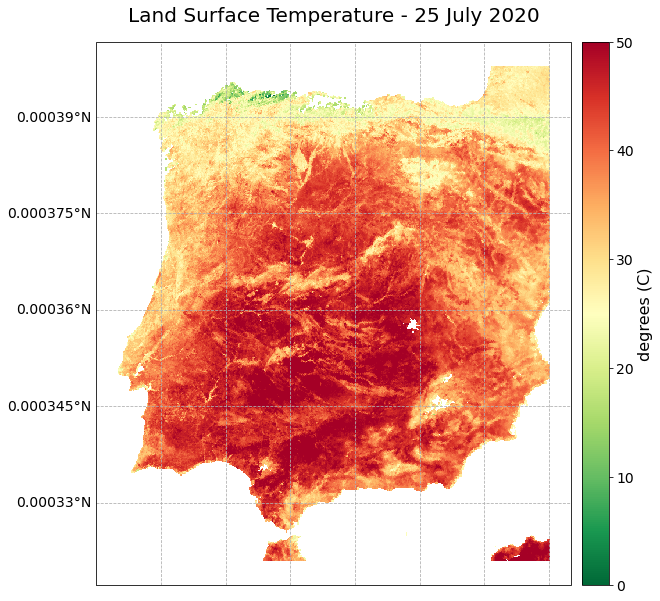

In [59]:
fig=plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.Sinusoidal())
img = plt.pcolormesh(lst_day_masked.longitude, 
                     lst_day_masked.latitude, 
                     lst_day_masked / scaling_factor, 
                     cmap=plt.get_cmap('RdYlGn_r'), 
                     transform=ccrs.Sinusoidal(),
                     vmin=0,
                     vmax=50,
                     shading='auto')

ax.coastlines(resolution='110m')

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img, ax=ax, orientation='vertical', fraction=0.044, pad=0.01)
cbar.set_label(unit, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title('Land Surface Temperature - 25 July 2020', fontsize=20, pad=20.0)

plt.show()

<br>

## <a id='frp'></a>Load, browse and visualize LSA SAF Fire Radiative Power Pixel (FRP Pixel)

The [FRPPIXEL product](https://landsaf.ipma.pt/en/products/fire-products/frppixel/) records information on the location, timing and fire radiative power (FRP, in MWatts) output of landscape fires ("wildfires") at the native spatial resolution of the SEVIRI sensor. 

Measuring FRP and integrating it over the lifetime of a fire provides an estimate of the total Fire Radiative Energy (FRE) released, which for landscape fires should be proportional to the total amount of biomass burned.

The disseminated product includes two HDF5 format files:
- `Quality Product file`: stores information for each SEVIRI pixel of why it was or was not detected as an active fire pixel
- `List Product file`: for all confirmed active fire pixels stores the location and time of the detection together with the fire pixels atmospherically corrected FRP and uncertainty (MW), the fire detection confidence measure (representing the level of confidence that the observation is indeed a "true" fire), and various other metrics including the individual spectral channel input signals.



<br>

### Load and browse the `List Product` file

The `List Product` file is disseminated in `HDF5` format. You can use the `h5py` library and it's `File` function to read the file.

The resulting object is a `HDF5 file` object, which acts like an iterator. Thus, with the `items` function you can list the different variables the file contains

In [60]:
file = h5py.File('./eodata/lsa_saf/frp_pixel/HDF5_LSASAF_MSG_FRP-PIXEL-ListProduct_MSG-Disk_202007261400', 'r')

for item in file.items():
    print(item)

('ABS_LINE', <HDF5 dataset "ABS_LINE": shape (2295,), type "<i2">)
('ABS_PIXEL', <HDF5 dataset "ABS_PIXEL": shape (2295,), type "<i2">)
('ACQTIME', <HDF5 dataset "ACQTIME": shape (2295,), type "<i2">)
('BT_MIR', <HDF5 dataset "BT_MIR": shape (2295,), type "<i2">)
('BT_TIR', <HDF5 dataset "BT_TIR": shape (2295,), type "<i2">)
('BW_BTD', <HDF5 dataset "BW_BTD": shape (2295,), type "<i2">)
('BW_BT_MIR', <HDF5 dataset "BW_BT_MIR": shape (2295,), type "<i2">)
('BW_NUMPIX', <HDF5 dataset "BW_NUMPIX": shape (2295,), type "<i2">)
('BW_SIZE', <HDF5 dataset "BW_SIZE": shape (2295,), type "<i2">)
('ERR_ATM_TRANS', <HDF5 dataset "ERR_ATM_TRANS": shape (2295,), type "<i2">)
('ERR_BACKGROUND', <HDF5 dataset "ERR_BACKGROUND": shape (2295,), type "<i2">)
('ERR_FRP_COEFF', <HDF5 dataset "ERR_FRP_COEFF": shape (2295,), type "<i2">)
('ERR_RADIOMETRIC', <HDF5 dataset "ERR_RADIOMETRIC": shape (2295,), type "<i2">)
('ERR_VERT_COMP', <HDF5 dataset "ERR_VERT_COMP": shape (2295,), type "<i2">)
('FIRE_CONFIDENC

<br>

Above, you see, that the file contains a range of different parameters. 

The `get` function allows you to select a dataset you are interested in. Let us select `FRP`, which is the `Fire Radiative Power`:

In [61]:
frp = file.get('FRP')
frp


<HDF5 dataset "FRP": shape (2295,), type "<i4">

<br>

With `[()]`, you can select the data values of the data set. The function `attrs.items()` lists the dataset's attributes:

In [62]:
for item in frp.attrs.items():
    print(item)

('CAL_OFFSET', 999.0)
('CAL_SLOPE', 999.0)
('CLASS', b'Data')
('MISSING_VALUE', -999)
('NB_BYTES', 4)
('N_COLS', 1)
('N_LINES', 2295)
('OFFSET', 0.0)
('PRODUCT', b'FRP')
('PRODUCT_ID', 255)
('SCALING_FACTOR', 10.0)
('UNITS', b'MW')


<br>

### Mask the Fire Radiative Power Pixel (FRP Pixel) values

Let us store the `MISSING_VALUE` and `SCALING_FACTOR` attribute values. Both values are used to create a masked data array, where missing values are flagged out. With numpy's `ma.masked_values()` function, you can create a masked data array.

In [63]:
scaling_factor = frp.attrs['SCALING_FACTOR']
missing_value = frp.attrs['MISSING_VALUE']

frp_masked = np.ma.masked_values(frp[()], missing_value)
frp_masked = frp_masked / scaling_factor
frp_masked

masked_array(data=[45.5, 102.2, 262.7, ..., 27.5, 23.7, 32.4],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-999)

<br>

### Load and mask `latitude` values

Repeat the masking for `latitude` values.

In [64]:
lat = file.get('LATITUDE')
lat

scaling_factor = lat.attrs['SCALING_FACTOR']
missing_value = lat.attrs['MISSING_VALUE']

lat_masked = np.ma.masked_values(lat[()], missing_value)
lat_masked = lat_masked / scaling_factor
lat_masked

masked_array(data=[39.88, 39.84, 39.84, ..., -30.2, -30.23, -30.23],
             mask=[False, False, False, ..., False, False, False],
       fill_value=19000)

<br>

### Load and mask `longitude` values

Repeat the masking for `longitude` values.

In [65]:
lon = file.get('LONGITUDE')
lon

scaling_factor = lon.attrs['SCALING_FACTOR']
missing_value = lon.attrs['MISSING_VALUE']

lon_masked = np.ma.masked_values(lon[()], missing_value)
lon_masked = lon_masked / scaling_factor
lon_masked

masked_array(data=[-7.92, -7.96, -7.92, ..., 28.77, 28.74, 28.78],
             mask=[False, False, False, ..., False, False, False],
       fill_value=19000)

<br>

### Visualize `FRP Pixel` values with matplotlib's `scatter` function

You can created a customized `ColorMap` and define the levels for the respective `FRP` classes.

In [66]:
frp_cm = ListedColormap([[0, 0, 255./255.],
                                 [176./255., 196./255., 222./255.],
                                 [255./255., 255./255., 0],
                                 [1., 140./255., 0],
                                 [178./255., 34./255., 34./255.],
                                 [1, 0, 0]])
bounds = [0, 30, 40, 60, 80, 120, 500]
norm = BoundaryNorm(bounds, frp_cm.N)


<br>

The last step is to visualize the `FRP` data with matplotlib's `scatter` function. You use the masked data information of `latitude`, `longitude` and `frp`.

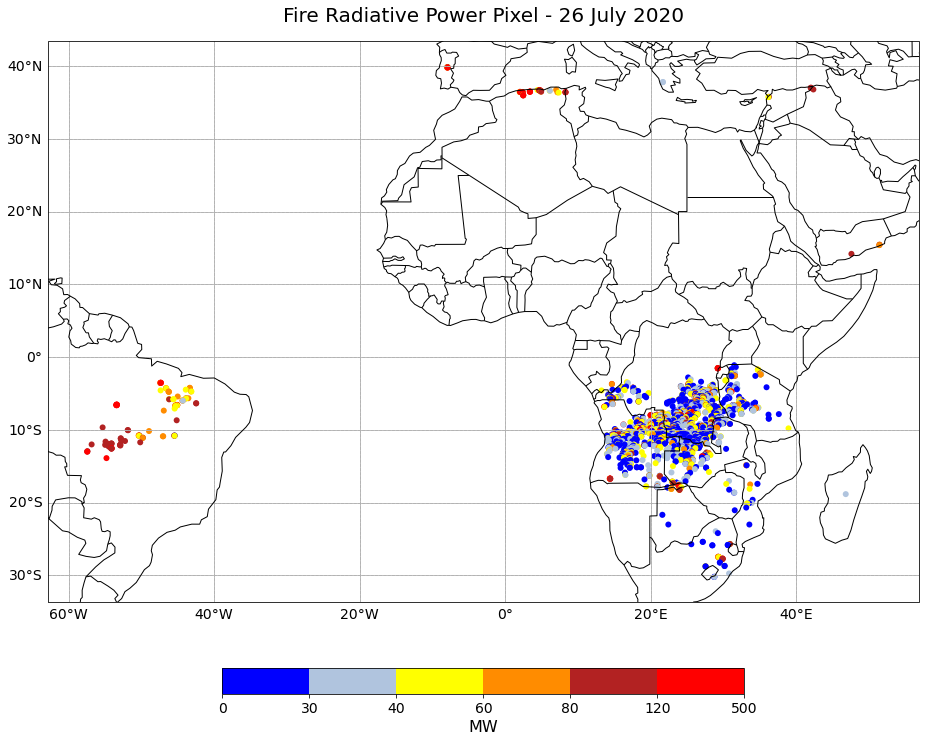

In [71]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(zorder=3)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=3)
gl = ax.gridlines()
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}


img1 = plt.scatter(lon_masked,lat_masked, c=frp_masked,
                   edgecolors='none',
                   cmap=frp_cm,
                   norm=norm,
                   zorder=2)


cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('MW',fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title('Fire Radiative Power Pixel - 26 July 2020', fontsize=20, pad=20.0)

plt.show()

<br>

## <a id='ndvi'></a>Load, browse and visualize LSA SAF `Normalized Difference Vegetation Index (NDVI)`

The [LSA SAF Normalized Difference Vegetation Index (NDVI)](https://landsaf.ipma.pt/en/products/vegetation/endvi/) are near-global, 10-daily composite images which are synthesized from the "best available" observations registered in the course of every "dekad" by the orbiting earth observation system MetOp-AVHRR. The composites represent a `Normalized Difference Vegetation Index` and are distributed together with a set of ancillary dataset layers (surface reflectances, sun and view angles, quality indicators) as part of EUMETSAT LSA SAF program.

From a temporal aspect, every month is divided in three "dekads". The first two always comprise ten days (1-10, 11-20), the third one has variable length as it runs from day 21 until the end of the month. The distinction between "days" is based on UT/GMT criteria.

From a spectral aspect, each composite comprises twelve separate image layers. The NDV layer represents the Normalized Difference Vegetation Index, while the other layers are considered as ancillary layers: synthesis reflectance values, viewing angles, status map.

The composites are transferred to the users in ZIP-form. Each ZIP thus comprises 26 files: twelve IMGs, twelve HDRs, one XML (INSPIRE compatible metadata) and one TIFF (a quicklook map of the NDVI layer).

In [73]:
file = './eodata/lsa_saf/ndvi/2020/07/21/METOP_AVHRR_20200721_S10_EUR_NDV.img'


<br>

Let us store the metadata information of the `HDR` files as dictionary. This can be done with the following for loop:

In [74]:
hdr = os.path.splitext(file)[0]+'.hdr'
hdr
hdr_set = {}

myfileobj = open(hdr, "r")    
for line in myfileobj.readlines():   
    line = [x.strip() for x in line.split(' = ')]
    if len(line) > 1:
        if line[0] == 'values':
            line[0] = 'VALUES'
        hdr_set[line[0]] = line[1]

hdr_set

{'description': '{METOP-AVHRR, 10-daily synthesis, 20200721-20200731, NDVI, processing by VITO-Belgium }',
 'samples': '8176',
 'lines': '5600',
 'bands': '1',
 'interleave': 'BSQ',
 'file type': 'ENVI Standard',
 'data type': '1',
 'sensor type': 'METOP-AVHRR',
 'map info': '{ Geographic Lat/Lon, 1.5, 1.5, -11.0, 75.0,  0.0089285714,  0.0089285714, WGS-84, units=Degrees }'}

<br>

#### Helper function `hdrtypelib` to retrieve `envidtype`

In [75]:
def hdrdtypelib():
    """
    Derived from Gaston library (Roel).
    Translates BPP (Bytes Per Pixel) to dtype string.
    """
    envidtypelib = {'1':'uint8',
                  '2':'int16',
                  '3':'int32',
                  '4':'float32'}
    return envidtypelib

<br>

Retrieve the `datatype` from the `hdr` dictionary and load the respective `envidtype` with the help of the `hdrtypelib()` function. The `datatype` of this example is `1`, which translates to `uint8`.

In [76]:
hdrdtype =  hdr_set['data type'] #get datatype from hdr_set
envidtypelib = hdrdtypelib()
dtype = envidtypelib[hdrdtype]

<br>

Load the DN values from the image file as `numpy array` with numpy's function `np.fromfile()`. Once the data is loaded, you want to convert it into a `2D-array`.

In [77]:
#get DN from image
data=np.fromfile(file,dtype=dtype)
#convert to 2D array
data.shape=(-1,int(hdr_set['samples']))
data

#Convert to float64 datatype
data_2 = np.float64(data)
data_2

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [ 45.,  44.,  44., ..., 255., 255., 255.],
       [ 44.,  44.,  44., ..., 255., 255., 255.],
       [ 43.,  43.,  44., ..., 255., 255., 255.]])

<br>

### Mask the data with numpy's `np.ma.masked_values` function

Mask the data with numpy's function `np.ma.masked_values()`. Missing value is the data array's maximum values.

In [78]:
missing_value = np.max(data_2)
data_masked = np.ma.masked_values(data_2, missing_value)
data_masked_4 = 0.004*data_masked-0.08
data_masked_4

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [0.09999999999999999, 0.09599999999999999, 0.09599999999999999,
         ..., --, --, --],
        [0.09599999999999999, 0.09599999999999999, 0.09599999999999999,
         ..., --, --, --],
        [0.09200000000000001, 0.09200000000000001, 0.09599999999999999,
         ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=255.0)

<br>

### Visualize the `NDVI` values with matplotlib's `imshow` function

Now, you can plot the data array with the `imshow` function of the matplotlib library.

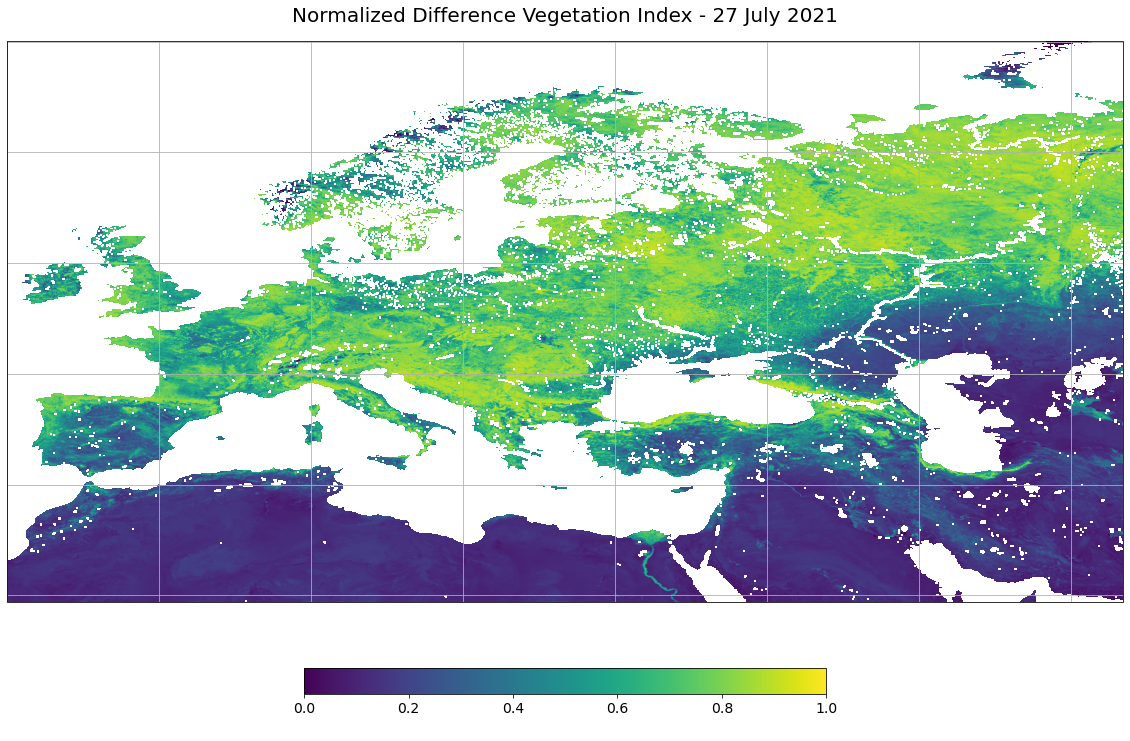

In [82]:
fig=plt.figure(figsize=(20, 12))

ax=plt.axes(projection=ccrs.Sinusoidal())

gl = ax.gridlines()


img1 = plt.imshow(data_masked_4,
                          vmin=0,
                          vmax=1,
                          aspect='auto')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)


cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(' ',fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title('Normalized Difference Vegetation Index - 27 July 2021', fontsize=20, pad=20.0)

plt.show()

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./32_Sentinel-5P_TROPOMI_UVAI.ipynb"><< 32 - Sentinel-5P TROPOMI UVAI </a><span style=float:right;><a href="./51_CAMS_GFAS_FRPFIRE.ipynb">51 - CAMS GFAS FRPFIRE >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.